In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [2]:
# define state
class BMIState(TypedDict):
    weight_kg : float
    height_m :float
    bmi : float
    categories : str
    

In [3]:
def calculate_bmi(state:BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight/(height**2)
    state['bmi'] = bmi
    return state

In [9]:
def calcualte_category(state:BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state['categories'] = category
    return state

In [10]:
# define the graph
graph = StateGraph(BMIState)

# add nodes
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('calculate_category',calcualte_category)

# add edges
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','calculate_category')
graph.add_edge('calculate_category',END)

# compile the graph
workflow = graph.compile()

In [11]:
# execute the graph

initial_state = {'weight_kg':90,'height_m':1.73}
final_state = workflow.invoke(initial_state)
final_state

{'weight_kg': 90,
 'height_m': 1.73,
 'bmi': 30.071168431955627,
 'categories': 'Obesity'}

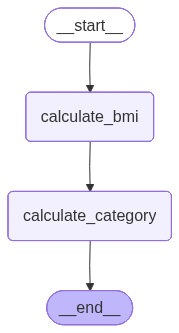

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())